# Impacto del título en la popularidad en los de videos de Youtube

Objetivos:
* Identificar los temas más populares en los videos de tendencia de YouTube para cada región (MX y USA).
* Evaluar la correlación entre la elección del título del video y las metricas de popularidad,como el número de visualizaciones.
* Presentar los resultados del análisis de los datos recopilados durante el mes de mayo de 2023 para identificar los temas más populares en los videos de tendencia.

In [ ]:
!pip install langdetect


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=460498b34467145b2b11230219cdbcf47a7d2d190e74b54eb23171218415df38
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install stopwordsiso


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install iso639

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for iso639: filename=iso639-0.1.4-py3-none-any.whl size=11174 sha256=643fe2d1ad7037d4f8025d323b835e0a135e5be9e33fc7fa54fff35cab2935ab
  Stored in directory: /root/.cache/pip/wheels/a5/b9/38/a15d4cd0f6d25de2d8731726b1d6ec9efcd3e04db912dd4e7f
Successfully built iso639


## Importacion librerías

In [ ]:
import pandas as pd
import os
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


## Importar dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_US = pd.read_csv('/content/drive/MyDrive/ML_2023A/data/pry_IB/US_youtube_trending_data.csv')
df_MX = pd.read_csv('/content/drive/MyDrive/ML_2023A/data/pry_IB/MX_youtube_trending_data.csv')

####México

In [ ]:
df_MX.head()


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113999,4380,5620,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...
1,JOaeND0xUNk,Belinda y Christian Nodal cantan De los besos ...,2020-08-11T18:03:06Z,UCNVrBkfp4_TG9x4h5kvLeAQ,TV Azteca,24,2020-08-12T00:00:00Z,tv azteca|videos de tv azteca|azteca uno|en su...,402507,8102,831,803,https://i.ytimg.com/vi/JOaeND0xUNk/default.jpg,False,False,Encendieron el escenario de La Voz. TV AztecaT...
2,SV91jnGs--s,¿QUIÉN HACE LOS MEJORES NUGGETS? | EL GUZII,2020-08-11T19:57:02Z,UCuGn3ioftOo6jvHE1YK4Bfw,El Guzii,26,2020-08-12T00:00:00Z,El Guzii|Guzzi|Guzy|Guzii Style|Recetas Divert...,735044,62188,1053,4100,https://i.ytimg.com/vi/SV91jnGs--s/default.jpg,False,False,Si tienes 10 kg de sobre peso tal vez te haz p...
3,QgX0zn5nMyk,Martha Figueroa se disculpa públicamente con N...,2020-08-11T15:57:47Z,UCJPd6seu4JK4PZjVVTWb0QA,Hoy,24,2020-08-12T00:00:00Z,Televisa|Televisa espectaculos|programa hoy te...,521751,4680,3129,2285,https://i.ytimg.com/vi/QgX0zn5nMyk/default.jpg,False,False,Mira aquí el contenido exclusivo que tenemos p...
4,cKaM19oAwBM,MAQUILLAJE PARA KIMBERLY LOAIZA✨ RESISTENTE AL...,2020-08-11T21:55:08Z,UCs5w0QCxsEWz83vuQyOCnuA,Victor Guadarrama,26,2020-08-12T00:00:00Z,MAQUILLAJE|CELEBS|ARTE|MAKEUP|PESTAÑAS|KIMBERL...,168118,24551,537,782,https://i.ytimg.com/vi/cKaM19oAwBM/default.jpg,False,False,No olvides suscribirte y activar la campanita ...


In [ ]:
df_MX.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

####Estados Unidos

In [ ]:
df_US.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
df_US.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

## Procesamiento

### Filtrar datos Mayo 2023

####México

In [ ]:
# Convertir la columna 'publishedAt' a tipo fecha
df_MX['publishedAt'] = pd.to_datetime(df_MX['publishedAt'])

# Filtrar los datos para el mes de mayo de 2023
mayo_2023_mx = df_MX[(df_MX['publishedAt'].dt.year == 2023) & (df_MX['publishedAt'].dt.month == 5)]

# Mostrar los datos filtrados
mayo_2023_mx.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
199198,11wTIj8c9IQ,Champion Hog Rider?! (Season Event!),2023-05-01 09:00:01+00:00,UC_F8DoJf9MZogEOU51TpTbQ,Clash Royale,20,2023-05-02T00:00:00Z,Clash Royale|Clash Royale Game|Supercell|Super...,830297,18908,0,1284,https://i.ytimg.com/vi/11wTIj8c9IQ/default.jpg,False,False,Hog Rider Terry from Books of Clash comic book...
199200,KU_NwIFIbvI,¿EXTRAÑO A MI EX? ¿NOS GUSTAMOS? | Domelipa Ft...,2023-05-01 01:30:12+00:00,UC6x71GcLpFRJC15pWnq12NQ,Domelipa,24,2023-05-02T00:00:00Z,[None],296548,30707,0,1296,https://i.ytimg.com/vi/KU_NwIFIbvI/default.jpg,False,False,NaN
199206,tacIxqNmB3c,UN DATO INÚTIL SOBRE TI...,2023-05-01 02:00:18+00:00,UCa_M7VbdEVTc1yRMclRmjpw,Islas Vlogs,22,2023-05-02T00:00:00Z,[None],240490,12709,0,196,https://i.ytimg.com/vi/tacIxqNmB3c/default.jpg,False,False,Cazando los mejores DATOS INUTILES
199207,5CFkK4P3-5k,Clásico instantáneo | Liga Premier | Resumen -...,2023-05-01 00:00:02+00:00,UCW8leg1zCALE3STqOhisitA,Paramount+ México,24,2023-05-02T00:00:00Z,paramount+|paramount plus latinoamerica|paramo...,170806,2874,0,229,https://i.ytimg.com/vi/5CFkK4P3-5k/default.jpg,False,False,Goles en tiempo de compensación nos regalaron ...
199211,wm5XK2qHUtw,Medieval Upheaval With Dark Ages King! (Clash ...,2023-05-01 08:00:32+00:00,UCD1Em4q90ZUK2R5HKesszJg,Clash of Clans,20,2023-05-02T00:00:00Z,clash of clans|COC|Clash of Clans Gameplay|Cla...,1192511,26301,0,908,https://i.ytimg.com/vi/wm5XK2qHUtw/default.jpg,False,False,Protect your fiefdom and charge your foes with...


In [ ]:
mayo_2023_mx.shape

(6177, 16)

####Estados Unidos

In [ ]:
# Convertir la columna 'publishedAt' a tipo fecha
df_US['publishedAt'] = pd.to_datetime(df_US['publishedAt'])

# Filtrar los datos para el mes de mayo de 2023
mayo_2023_us = df_US[(df_US['publishedAt'].dt.year == 2023) & (df_US['publishedAt'].dt.month == 5)]

# Mostrar los datos filtrados
mayo_2023_us.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
199390,SuPo5UjYyE4,Stephen A. REVEALS what spells trouble for the...,2023-05-01 15:37:17+00:00,UCVSSpcmZD2PwPBqb8yKQKBA,NBA on ESPN,17,2023-05-02T00:00:00Z,Stephen A. REVEALS what spells trouble for the...,335324,4540,0,2263,https://i.ytimg.com/vi/SuPo5UjYyE4/default.jpg,False,False,"On First Take, Stephen A. Smith, Kendrick Perk..."
199391,C-WQcCqecHg,Apex Legends: Arsenal Gameplay Trailer,2023-05-01 15:00:15+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2023-05-02T00:00:00Z,apex legends|apex|apex legends season 17|apex ...,1444465,56517,0,3800,https://i.ytimg.com/vi/C-WQcCqecHg/default.jpg,False,False,Show your caliber in Apex Legends: Arsenal. Th...
199393,EU04UEnhv_o,Jack Harlow - They Don't Love It [Official Mus...,2023-05-01 16:00:08+00:00,UC6vZl7Qj7JglLDmN_7Or-ZQ,Jack Harlow,10,2023-05-02T00:00:00Z,jack harlow|jack rapper|harlow rapper|private ...,443608,38141,0,1859,https://i.ytimg.com/vi/EU04UEnhv_o/default.jpg,False,False,Jack Harlow - They Don't Love ItListen to 'Jac...
199395,wIBZ7UcQmDU,[최초공개] LE SSERAFIM(르세라핌) - UNFORGIVEN (feat. N...,2023-05-01 11:25:34+00:00,UCTQVIXvcHrR9jYoJ6qaBAow,M2,24,2023-05-02T00:00:00Z,엠넷|Mnet|엠투|M2|MPD|엠피디|Kpop|K-Pop|K팝|아이돌|한국|라이브...,3561258,240804,0,5594,https://i.ytimg.com/vi/wIBZ7UcQmDU/default.jpg,False,False,[LE SSERAFIM COMEBACK SHOW UNFORGIVEN] LE SSER...
199397,FJqd58_WgGo,Zach Bryan - Oklahoma Smokeshow,2023-05-01 04:24:38+00:00,UCwK3C8Vgphad4PweezfUBAQ,Zach Bryan,10,2023-05-02T00:00:00Z,[None],163561,10006,0,501,https://i.ytimg.com/vi/FJqd58_WgGo/default.jpg,False,False,NaN


In [ ]:
mayo_2023_us.shape

(6191, 16)

### Título, # de Visualizaciones

####México

In [ ]:
# Seleccionar las columnas 'title' y 'view_count'
data_mx = mayo_2023_mx[['title', 'view_count']]

# Imprimir los resultados
data_mx.head()

,title,view_count
199198,Champion Hog Rider?! (Season Event!),830297
199200,¿EXTRAÑO A MI EX? ¿NOS GUSTAMOS? | Domelipa Ft...,296548
199206,UN DATO INÚTIL SOBRE TI...,240490
199207,Clásico instantáneo | Liga Premier | Resumen -...,170806
199211,Medieval Upheaval With Dark Ages King! (Clash ...,1192511


Identificar valores nulos

In [ ]:
missing_values = data_mx[['title', 'view_count']].isnull().sum()

# Imprimir el número de valores faltantes o nulos en cada columna
missing_values

title         0
view_count    0
dtype: int64

Verificar formato de los datos

In [ ]:
data_mx.dtypes

title         object
view_count     int64
dtype: object

Ordenar los datos en base a view_count

In [ ]:
data_mx_sorted = data_mx.sort_values('view_count', ascending=True)
data_mx_sorted

,title,view_count
199838,Live at the Met Gala With Vogue,0
201597,Live at the Met Gala With Vogue,0
201149,Live at the Met Gala With Vogue,0
199610,Live at the Met Gala With Vogue,0
200463,Live at the Met Gala With Vogue,0
...,...,...
206739,"Ages 1 - 100 Fight For $500,000",111343139
206944,"Ages 1 - 100 Fight For $500,000",113492235
207149,"Ages 1 - 100 Fight For $500,000",115652815
207389,"Ages 1 - 100 Fight For $500,000",118788141


Dividir el conjunto de datos ordenados quintiles y crear una nueva columna en la base
de datos para almacenar las categorías basadas en los quintiles llamada
category_view_count.

In [ ]:
#Asignamos los datos ordenados a una nueva variable
data_mx_1=data_mx_sorted
# Calcular los quintiles y asignar las categorías a la columna 'category_view_count'
data_mx_1['category_view_count'] = pd.qcut(data_mx_1['view_count'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])


En donde los quintiles desde Q1 a Q2 van desde el menos visto al más visto

In [ ]:
data_mx_1

,title,view_count,category_view_count
199838,Live at the Met Gala With Vogue,0,Q1
201597,Live at the Met Gala With Vogue,0,Q1
201149,Live at the Met Gala With Vogue,0,Q1
199610,Live at the Met Gala With Vogue,0,Q1
200463,Live at the Met Gala With Vogue,0,Q1
...,...,...,...
206739,"Ages 1 - 100 Fight For $500,000",111343139,Q5
206944,"Ages 1 - 100 Fight For $500,000",113492235,Q5
207149,"Ages 1 - 100 Fight For $500,000",115652815,Q5
207389,"Ages 1 - 100 Fight For $500,000",118788141,Q5


####Estados Unidos



In [ ]:
# Seleccionar las columnas 'title' y 'view_count'
data_us = mayo_2023_us[['title', 'view_count']]

# Imprimir los resultados
data_us.head()

,title,view_count
199390,Stephen A. REVEALS what spells trouble for the...,335324
199391,Apex Legends: Arsenal Gameplay Trailer,1444465
199393,Jack Harlow - They Don't Love It [Official Mus...,443608
199395,[최초공개] LE SSERAFIM(르세라핌) - UNFORGIVEN (feat. N...,3561258
199397,Zach Bryan - Oklahoma Smokeshow,163561


Identificar valores nulos

In [ ]:
missing_values = data_us[['title', 'view_count']].isnull().sum()

# Imprimir el número de valores faltantes o nulos en cada columna
missing_values

title         0
view_count    0
dtype: int64

Verificar formato de los datos

In [ ]:
data_us.dtypes

title         object
view_count     int64
dtype: object

Ordenar los datos en base a view_count

In [ ]:
data_us_sorted = data_us.sort_values('view_count', ascending=True)
data_us_sorted

,title,view_count
200970,Live at the Met Gala With Vogue,0
200287,Live at the Met Gala With Vogue,0
201188,Live at the Met Gala With Vogue,0
200044,Live at the Met Gala With Vogue,0
200735,Live at the Met Gala With Vogue,0
...,...,...
205422,"Ages 1 - 100 Fight For $500,000",84406948
205657,"Ages 1 - 100 Fight For $500,000",90058865
205893,"Ages 1 - 100 Fight For $500,000",95520120
206127,"Ages 1 - 100 Fight For $500,000",100294791


Dividir el conjunto de datos ordenados quintiles y crear una nueva columna en la base
de datos para almacenar las categorías basadas en los quintiles llamada
category_view_count.

In [ ]:
#Asignamos los datos ordenados a una nueva variable
data_us_1=data_us_sorted
# Calcular los quintiles y asignar las categorías a la columna 'category_view_count'
data_us_1['category_view_count'] = pd.qcut(data_us_1['view_count'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])


En donde los quintiles desde Q1 a Q2 van desde el menos visto al más visto

In [ ]:
data_us_1

,title,view_count,category_view_count
200970,Live at the Met Gala With Vogue,0,Q1
200287,Live at the Met Gala With Vogue,0,Q1
201188,Live at the Met Gala With Vogue,0,Q1
200044,Live at the Met Gala With Vogue,0,Q1
200735,Live at the Met Gala With Vogue,0,Q1
...,...,...,...
205422,"Ages 1 - 100 Fight For $500,000",84406948,Q5
205657,"Ages 1 - 100 Fight For $500,000",90058865,Q5
205893,"Ages 1 - 100 Fight For $500,000",95520120,Q5
206127,"Ages 1 - 100 Fight For $500,000",100294791,Q5


### Subconjunto de datos por Quintiles

####México

#####Datos Q1

In [ ]:
# Filtrar los datos correspondientes a la categoría "Q1"
q1_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q1']
q1_data_mx

,title,view_count,category_view_count
199838,Live at the Met Gala With Vogue,0,Q1
201597,Live at the Met Gala With Vogue,0,Q1
201149,Live at the Met Gala With Vogue,0,Q1
199610,Live at the Met Gala With Vogue,0,Q1
200463,Live at the Met Gala With Vogue,0,Q1
...,...,...,...
203435,LOS NÚMEROS-PITIN TOYS FT NUEVOS REBELDES (EN ...,290982,Q1
203078,"Los Bukis - Te amo, mamá | Lyric video",291127,Q1
202749,GRACIAS MADRECITA - GABBY TAMEZ,291195,Q1
202134,Se Confirma Muerte de Carlos Parra Vocalista d...,291198,Q1


Procesamiento del campo "title" para extraer las palabras más usadas

######todos los lenguajes

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from langdetect import detect
from stopwordsiso import stopwords as stopwordsiso

# Descargar los recursos necesarios de NLTK
nltk.download('punkt')

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q1_data_mx['title']:
    # Detectar el idioma del título
    try:
        lang = detect(title)
    except:
        lang = 'unknown'

    # Obtener las stopwords correspondientes al idioma
    if lang in stopwordsiso.langs():
        stop_words = stopwordsiso(lang)
    else:
        stop_words = set(stopwords.words('english'))  # Usar stopwords en inglés por defecto

    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())

    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words:
    print(word, "-", freq)

# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AttributeError: ignored

######en-sp

In [ ]:

# Obtener las stopwords en español e inglés
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_english = set(stopwords.words('english'))

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q1_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha() and word not in stop_words_spanish and word not in stop_words_english]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words1 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words1:
    print(word, "-", freq)




final - 68
liga - 68
vs - 66
así - 64
mx - 54
chivas - 51
video - 51
resumen - 49
oficial - 40
tigres - 40


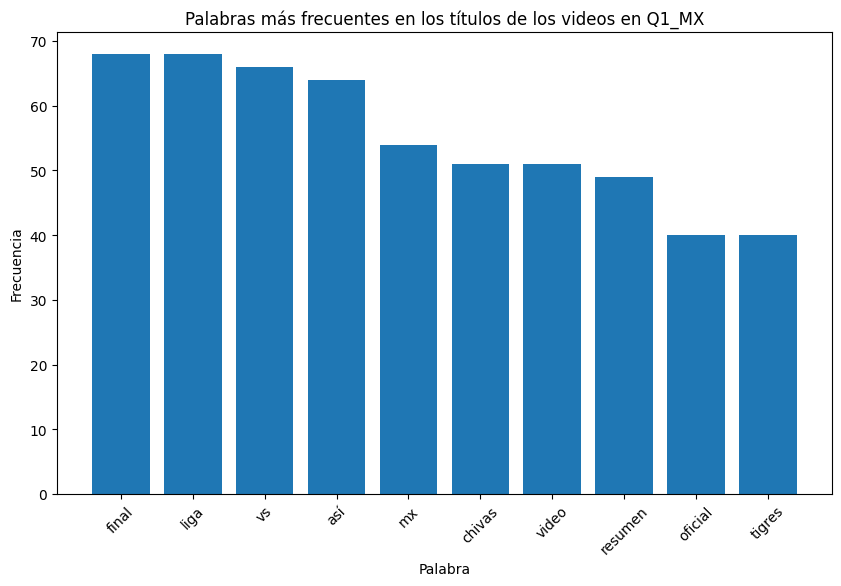

In [ ]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words1)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q1_MX')
plt.xticks(rotation=45)
plt.show()

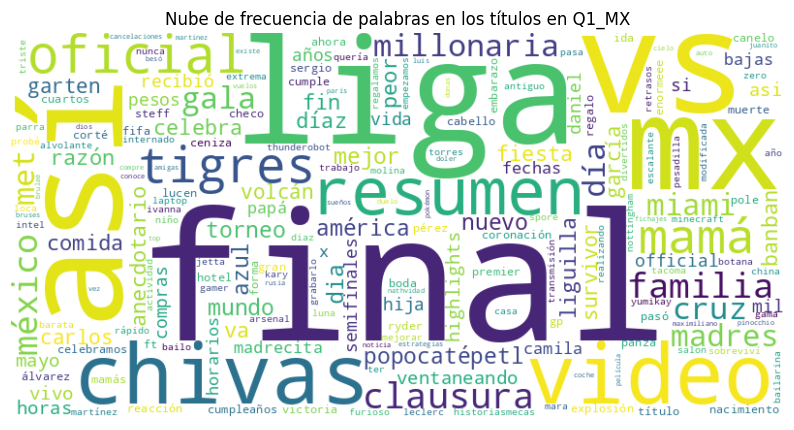

In [ ]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q1_MX')
plt.show()


#####Datos Q2

In [ ]:
# Filtrar los datos correspondientes a la categoría "Q2"
q2_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q2']
q2_data_mx

,title,view_count,category_view_count
201472,24 HORAS DE VIAJE CON MI HERMANO!!! Soy Fredy,291596,Q2
205274,Entramos a CAMERINOS con FUERZA REGIDA en MTY ...,291672,Q2
203634,7 HACKS de CONSTRUCCIÓN SEGURA de la FAMILIA B...,291969,Q2
202994,Craig y Eric: el dúo más cabr*n en Drake y Josh,292525,Q2
207131,Cuando un Peleador Mexicano Acabó con un Gigan...,292846,Q2
...,...,...,...
201712,Maluma dedica emotivo mensaje a Shakira en ple...,612092,Q2
203565,#SaskiaPodcast #PPL #Privadasdelalibertad EP 2...,612255,Q2
204838,Esculpiendo los ORIGENES de la BANBAN GANG FAN...,612653,Q2
201462,¡NO DEJES que EL VENADO MALDITO te ATRAPE!🦌🔪😈e...,612655,Q2


Procesamiento del campo "title" para extraer las palabras más usadas

######en-sp

In [ ]:
# Obtener las stopwords en español e inglés
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_english = set(stopwords.words('english'))

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q2_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha() and word not in stop_words_spanish and word not in stop_words_english]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words2 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words2:
    print(word, "-", freq)

video - 146
oficial - 79
vs - 64
official - 62
minecraft - 60
banban - 46
así - 46
día - 41
garten - 37
final - 34


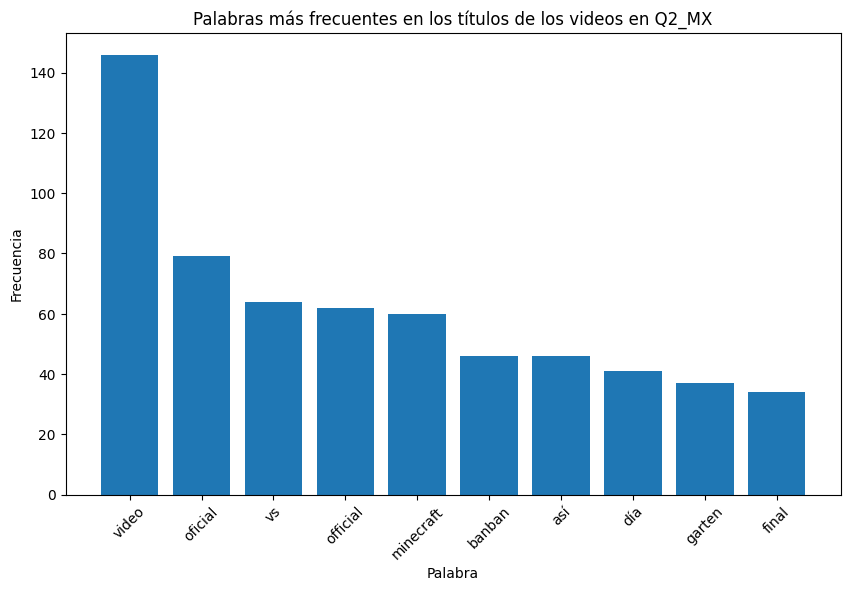

In [ ]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words2)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q2_MX')
plt.xticks(rotation=45)
plt.show()

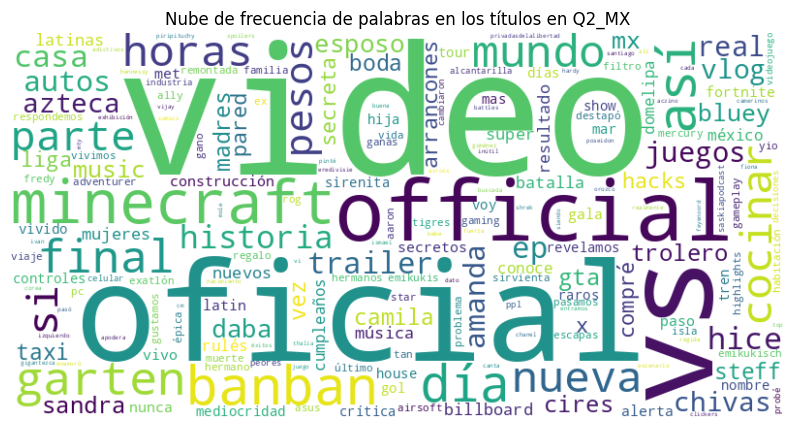

In [ ]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q2_MX')
plt.show()


#####Datos Q3

In [ ]:
# Filtrar los datos correspondientes a la categoría "Q3"
q3_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q3']
q3_data_mx

,title,view_count,category_view_count
203468,"Jesús Adrián Romero, Adriel Favela - El Ciel...",612997,Q3
203716,LAS 20 POLÉMICAS MÁS GRANDES DE FORTNITE,613552,Q3
200946,BARÇA 1-0 OSASUNA | LALIGA 2022/23 MD33,613742,Q3
202209,Ghost - Phantom Of The Opera (Official Audio),613836,Q3
205253,FINAL del MODO CARRERA de LOS PIBES FC (ÚLTIMO...,613905,Q3
...,...,...,...
201799,Abcdario,1081265,Q3
202063,Grupo Marca Registrada x Carín León - Me Haces...,1081894,Q3
200013,León irá a la final por la revancha de la Liga...,1082446,Q3
204352,¡Probando todos los Tacos del OXXO! | El Guzii,1082799,Q3


Procesamiento del campo "title" para extraer las palabras más usadas

######en-sp

In [ ]:
# Obtener las stopwords en español e inglés
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_english = set(stopwords.words('english'))

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q3_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha() and word not in stop_words_spanish and word not in stop_words_english]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words3 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words3:
    print(word, "-", freq)

video - 139
banban - 93
minecraft - 83
oficial - 70
official - 68
garten - 67
amor - 62
final - 59
invencible - 55
día - 39


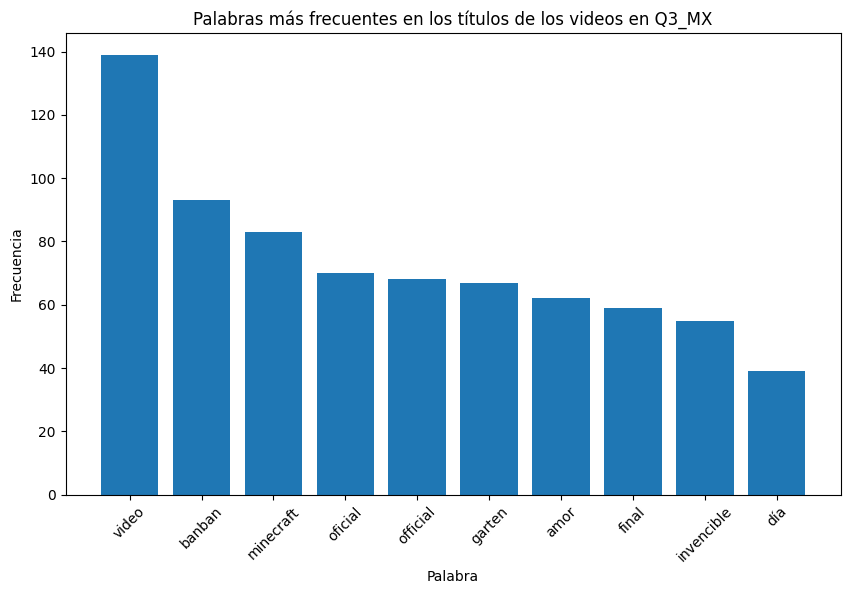

In [ ]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words3)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q3_MX')
plt.xticks(rotation=45)
plt.show()

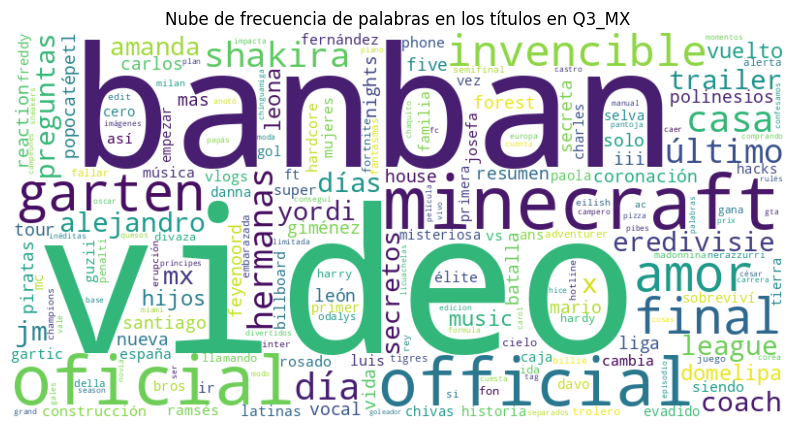

In [ ]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q3_MX')
plt.show()


#####Datos Q4

In [ ]:
# Filtrar los datos correspondientes a la categoría "43"
q4_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q4']
q4_data_mx

,title,view_count,category_view_count
205289,Did you miss me?,1083340,Q4
203085,La evolución de Super Mario (ANIMADA),1083533,Q4
206769,TAG DE LOS PAPÁS 👶🏼🍼 ¿Estamos separados? 💔 | C...,1083641,Q4
205424,¡HAUL! Un día conmigo decorando mi Nueva Casaa...,1084024,Q4
200801,MAIYE ESTÁ EMBARAZADA 🤰🏻😳// FAMILIA RECOCHA,1086358,Q4
...,...,...,...
203737,Stray Kids ＜★★★★★ (5-STAR)＞ UNVEIL : TRACK 3 죽...,2486136,Q4
202161,"Luis R Conriquez, Farruko - Me Metí En El Rued...",2488238,Q4
201267,Stray Kids ＜★★★★★ (5-STAR)＞ UNVEIL : TRACK 1 DLC,2489530,Q4
205190,Conan Gray - Never Ending Song (Official Music...,2489531,Q4


Procesamiento del campo "title" para extraer las palabras más usadas

######en-sp

In [ ]:
# Obtener las stopwords en español e inglés
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_english = set(stopwords.words('english'))

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q4_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha() and word not in stop_words_spanish and word not in stop_words_english ]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words4 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words4:
    print(word, "-", freq)

video - 238
official - 130
oficial - 116
resumen - 81
día - 67
x - 59
tudn - 40
vs - 39
ida - 38
casa - 37


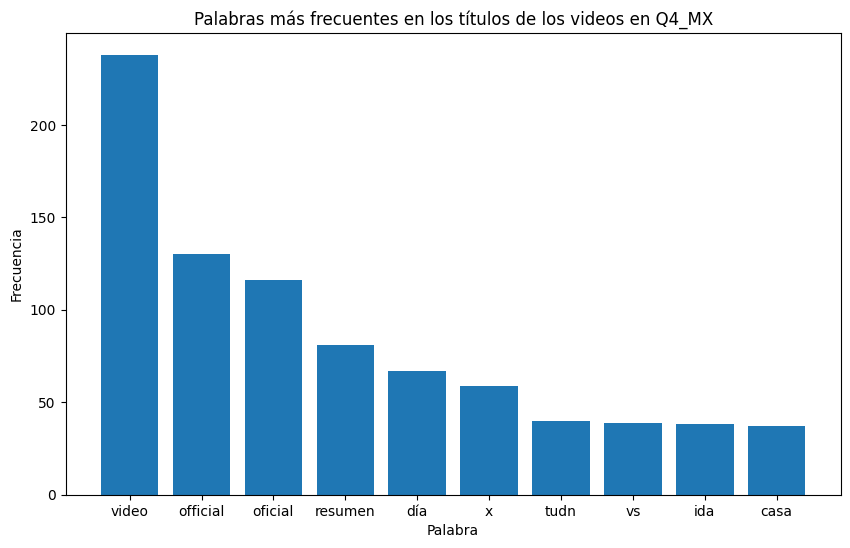

In [ ]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words4)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q4_MX')
plt.show()

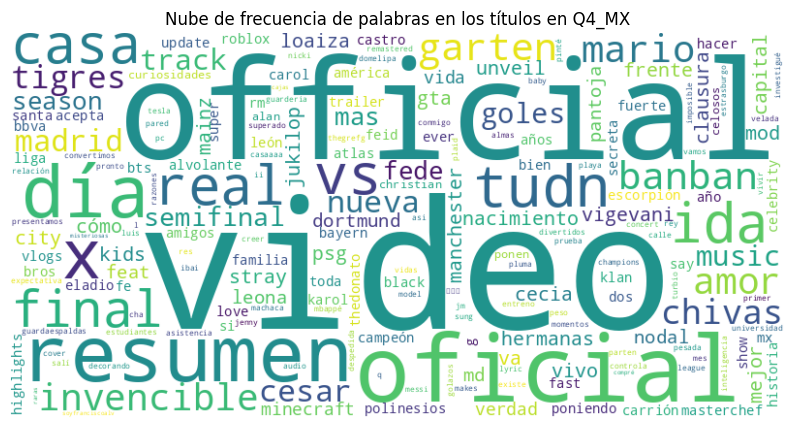

In [ ]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q4_MX')
plt.show()


#####Datos Q5

In [ ]:
# Filtrar los datos correspondientes a la categoría "Q5"
q5_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q5']
q5_data_mx

,title,view_count,category_view_count
203005,"Carin León x Camilo - Ni Me Debes, Ni Te Debo ...",2501297,Q5
205494,Chayanne - Bailando Bachata (Official Video),2501622,Q5
203101,NODAL ROMPE RÉCORD COMPRANDO SNEAKERS! Compró ...,2501820,Q5
204538,Roll Royce - Standly x Katteyes (Prod. Distoba...,2504401,Q5
205682,Bye,2514179,Q5
...,...,...,...
206739,"Ages 1 - 100 Fight For $500,000",111343139,Q5
206944,"Ages 1 - 100 Fight For $500,000",113492235,Q5
207149,"Ages 1 - 100 Fight For $500,000",115652815,Q5
207389,"Ages 1 - 100 Fight For $500,000",118788141,Q5


Procesamiento del campo "title" para extraer las palabras más usadas

######en-sp

In [ ]:
# Obtener las stopwords en español e inglés
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_english = set(stopwords.words('english'))

# Crear una lista de palabras
word_list = []

# Recorrer los títulos de los videos y agregar las palabras a la lista
for title in q5_data_mx['title']:
    # Tokenizar el título en palabras individuales
    words = word_tokenize(title.lower())
    # Eliminar las stopwords y los caracteres no alfabéticos
    words = [word for word in words if word.isalpha() and word not in stop_words_spanish and word not in stop_words_english ]
    # Agregar las palabras a la lista
    word_list.extend(words)

# Conteo de frecuencia de las palabras
word_freq = Counter(word_list)

# Obtener las 10 palabras más frecuentes
top_words5 = word_freq.most_common(10)

# Imprimir las palabras más frecuentes
for word, freq in top_words5:
    print(word, "-", freq)

video - 518
official - 332
oficial - 182
x - 120
music - 63
mv - 57
highlights - 55
kimberly - 54
loaiza - 54
jukilop - 41


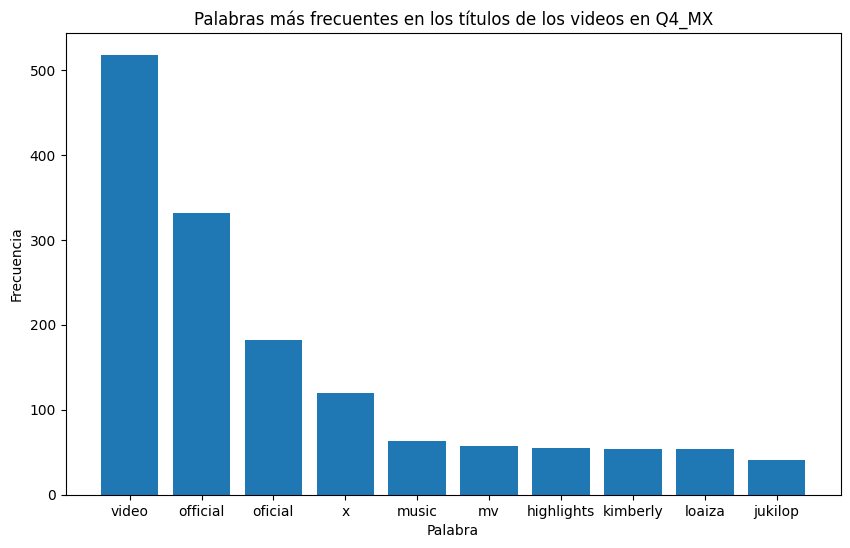

In [ ]:
# Gráfico de barras de las palabras más frecuentes
labels, values = zip(*top_words5)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los títulos de los videos en Q4_MX')
plt.show()

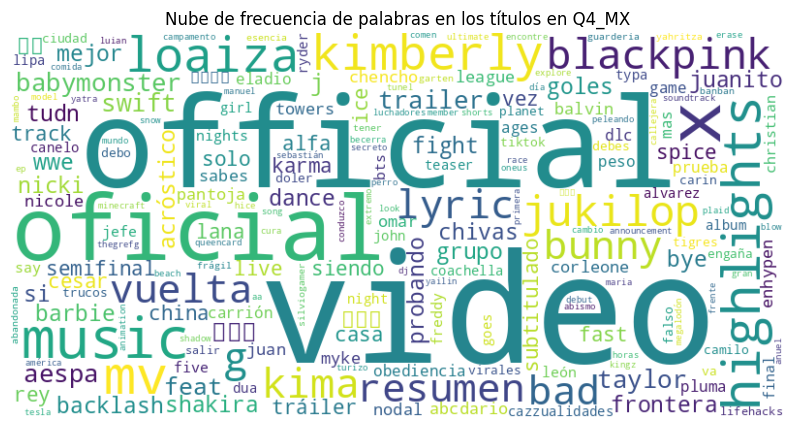

In [ ]:
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generar la nube de palabras
wordcloud.generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de frecuencia de palabras en los títulos en Q4_MX')
plt.show()


In [ ]:

# Crear un DataFrame con las palabras más frecuentes por quintil
df_top_words = pd.DataFrame({
    'Quintil 1': [word for word, _ in top_words1],
    'Quintil 2': [word for word, _ in top_words2],
    'Quintil 3': [word for word, _ in top_words3],
    'Quintil 4': [word for word, _ in top_words4],
    'Quintil 5': [word for word, _ in top_words5]
})

# Imprimir el DataFrame
df_top_words

,Quintil 1,Quintil 2,Quintil 3,Quintil 4,Quintil 5
0,final,video,video,video,video
1,liga,oficial,banban,official,official
2,vs,vs,minecraft,oficial,oficial
3,así,official,oficial,resumen,x
4,mx,minecraft,official,día,music
5,chivas,banban,garten,x,mv
6,video,así,amor,tudn,highlights
7,resumen,día,final,vs,kimberly
8,oficial,garten,invencible,ida,loaiza
9,tigres,final,día,casa,jukilop


Coeficiente de correlación de Pearson: -0.13639689036302036


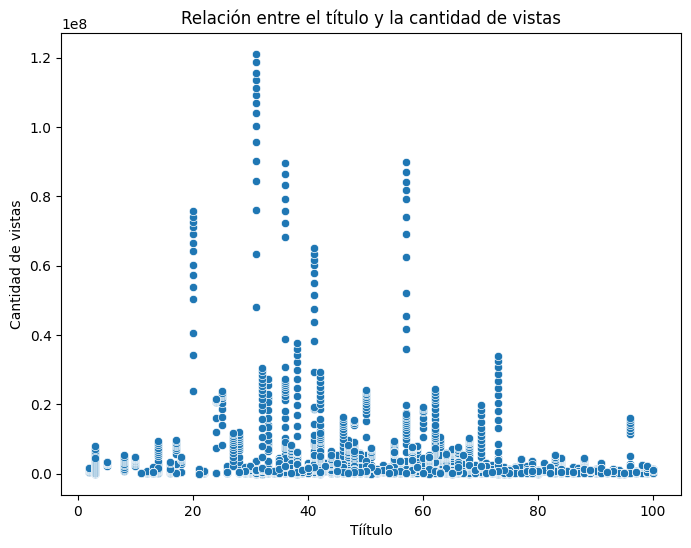

In [ ]:
import numpy as np
import seaborn as sns

# Calcular el coeficiente de correlación de Pearson
correlation = np.corrcoef(data_mx['title'].str.len(), data_mx['view_count'])[0, 1]

# Imprimir el coeficiente de correlación
print("Coeficiente de correlación de Pearson:", correlation)

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_mx['title'].str.len(), y=data_mx['view_count'])
plt.xlabel('Tíítulo')
plt.ylabel('Cantidad de vistas')
plt.title('Relación entre el título y la cantidad de vistas')
plt.show()
